<a href="https://colab.research.google.com/github/amrilhakimsihotang/Machine_Learning_Terapan/blob/Predictive_Analytics_Project/Project_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Amril Hakim Sihotang<br>
Project : Prediksi Harga Emas untuk Pengambilan Keputusan Investasi

##Import library

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from google.colab import files
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

##Mengaitkan Google Drive dengan notebook Colab

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
files.upload();

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38          15934        340  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                    2MB  2024-04-29 19:29:56           3150         67  1.0              
bhavikjikadara/global-electronics-retailers                      Global Electronics Retailers                       1MB  2024-05-01 09:08:52            895         25  1.0              
mexwell/heart-disease-dataset                                    🫀 Hea

##Download dataset dari <br>
https://www.kaggle.com/datasets/ahmadkarrabi/gold-price-archive-2010-2023-dataset

In [ ]:
!kaggle datasets download -d ahmadkarrabi/gold-price-archive-2010-2023-dataset


Dataset URL: https://www.kaggle.com/datasets/ahmadkarrabi/gold-price-archive-2010-2023-dataset
License(s): Apache 2.0
 58% 9.00M/15.5M [00:00<00:00, 34.6MB/s]
100% 15.5M/15.5M [00:00<00:00, 56.3MB/s]


##Ekstrak file yang sudah di download dan hasil ekstrak diletakkan di folder files

In [ ]:
!unzip -q /content/gold-price-archive-2010-2023-dataset.zip -d /content/files

##Loading dataset gold price archive 2010-2023<br>

In [ ]:
gold_resource='/content/files/XAUUSD_2010-2023.csv'
golds_data = pd.read_csv(gold_resource)
#untuk menghapus baris yang memiliki nilai yang hilang (NaN).
#Argumen inplace=True menyatakan bahwa perubahan akan diterapkan secara langsung pada DataFrame golds_data yang ada,
#tanpa perlu menetapkan hasilnya ke variabel baru.
golds_data.dropna(inplace=True)
golds_data

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
985999,2023-12-29 16:35:00,2063.07,2063.24,2062.60,2062.96,39.44,2063.48
986000,2023-12-29 16:40:00,2062.95,2063.09,2062.52,2062.61,37.12,2063.27
986001,2023-12-29 16:45:00,2062.60,2062.83,2062.34,2062.56,36.79,2063.06
986002,2023-12-29 16:50:00,2062.56,2063.20,2062.51,2062.54,36.65,2062.95


##Menampilkan jumlah nilai null dalam setiap kolom

In [ ]:
print(golds_data.isnull().sum())

time     0
open     0
high     0
low      0
close    0
rsi14    0
sma14    0
dtype: int64


##Perintah untuk mendapatkan informasi tentang DataFrame golds_data

In [ ]:
golds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986004 entries, 0 to 986003
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    986004 non-null  object 
 1   open    986004 non-null  float64
 2   high    986004 non-null  float64
 3   low     986004 non-null  float64
 4   close   986004 non-null  float64
 5   rsi14   986004 non-null  float64
 6   sma14   986004 non-null  float64
dtypes: float64(6), object(1)
memory usage: 52.7+ MB


##Perintah yang digunakan untuk memberikan ringkasan <br>statistik deskriptif tentang DataFrame golds_data

In [ ]:
golds_data.describe()

,open,high,low,close,rsi14,sma14
count,986004.000000,986004.000000,986004.000000,986004.000000,986004.000000,986004.000000
mean,1480.687806,1481.201203,1480.169858,1480.688379,50.260961,1480.681750
std,269.235947,269.360461,269.108012,269.235929,11.309953,269.230025
min,1046.920000,1048.080000,1044.180000,1046.940000,3.000000,1048.840000
25%,1252.750000,1253.080000,1252.400000,1252.750000,42.810000,1252.740000
50%,1373.580000,1374.180000,1373.055000,1373.580000,50.250000,1373.580000
75%,1732.680000,1733.320000,1732.010000,1732.680000,57.730000,1732.660000
max,2138.000000,2145.140000,2125.980000,2138.410000,96.800000,2116.810000


#Pengamatan terhadap outliers

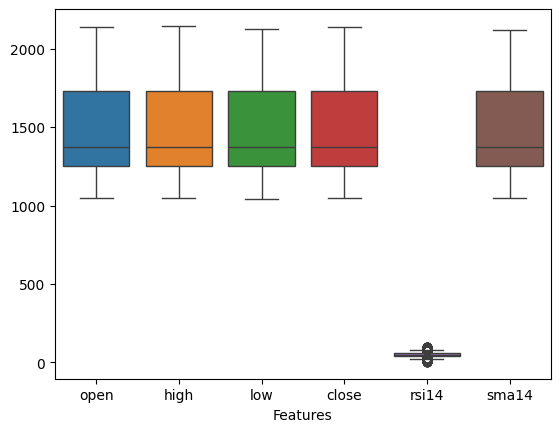

In [ ]:
sns.boxplot(data=golds_data[['open','high','low','close','rsi14','sma14']])
plt.xlabel('Features')
plt.show()

#Untuk memastikan kembali mengenai adanya outliers atau tidak<br> menggunakan metode Z-score

In [ ]:
def calculate_z_score(df, columns):
    z_score_df = pd.DataFrame()

    for col in columns:
        col_zscore = col + '_zscore'
        z_score_df[col_zscore] = (df[col] - df[col].mean()) / df[col].std(ddof=0)

    return z_score_df

kolom = ['open', 'high', 'low', 'close', 'rsi14', 'sma14']

z_score_result = calculate_z_score(golds_data, kolom)

z_score_result.shape

(986004, 6)

#Menggunakan metode IQR untuk mengamati kembali adanya outliers

In [ ]:
numeric_columns=['open','high','low','close','rsi14','sma14']
Q1 = golds_data[numeric_columns].quantile(0.25)
Q3 = golds_data[numeric_columns].quantile(0.75)
IQR = Q3-Q1
golds_data = golds_data[~((golds_data[numeric_columns] < (Q1 - 1.5 * IQR)) | (golds_data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Cek ukuran dataset setelah di drop outliers
golds_data.shape

(976717, 7)

#Univariate Analysis - price untuk Close

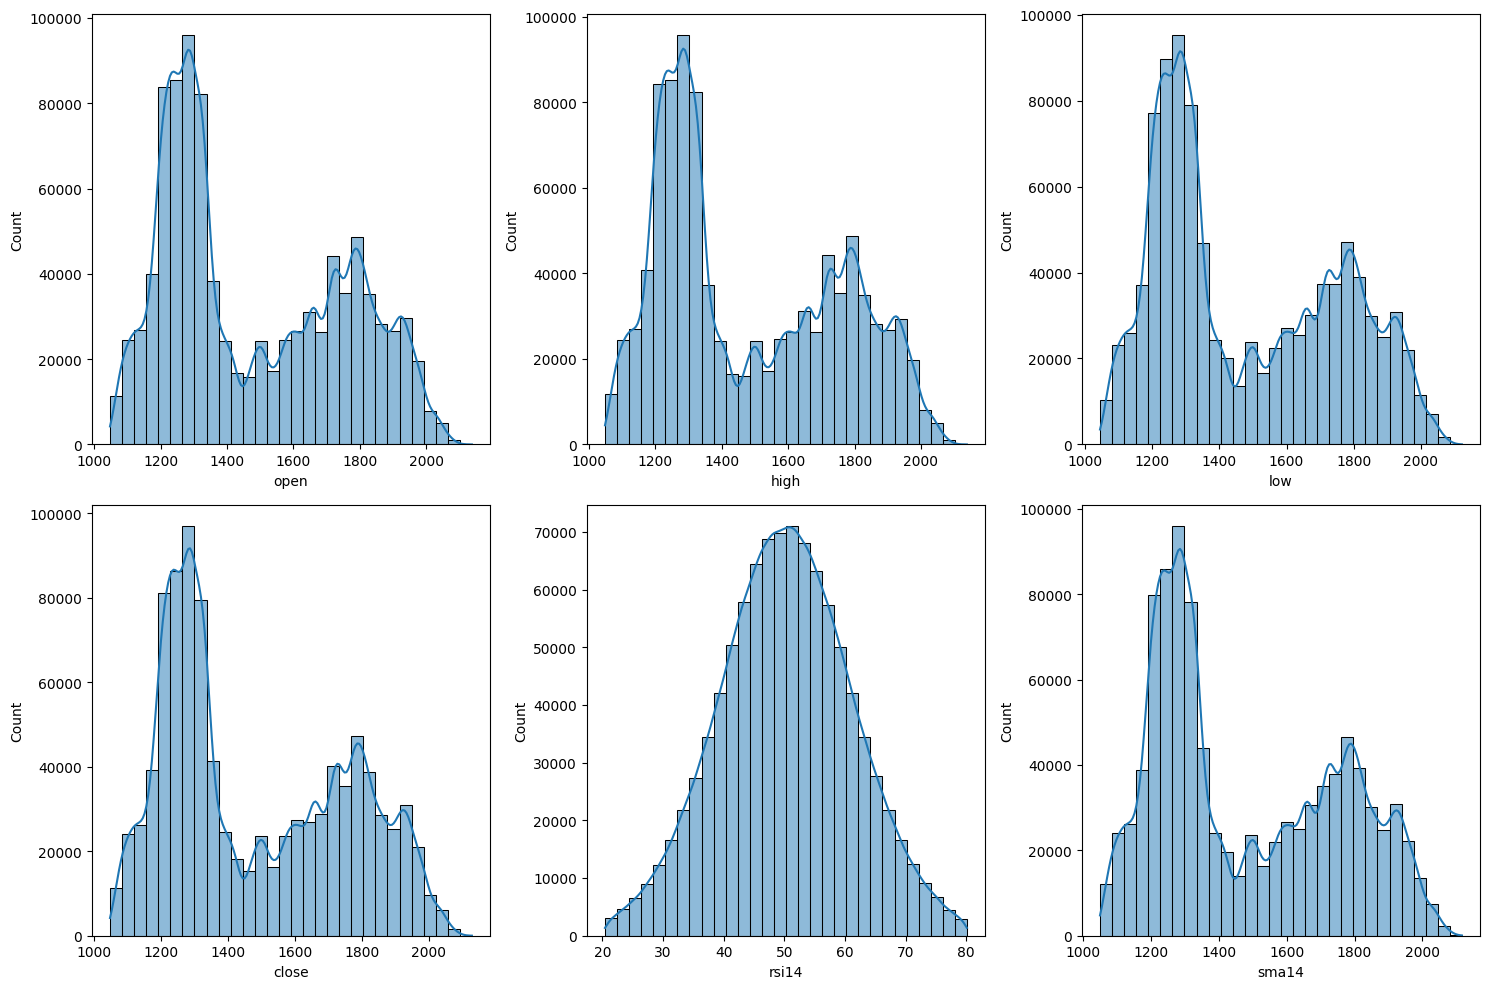

In [ ]:
cols = 3
rows = 2
fig = plt.figure(figsize=(cols * 5, rows * 5))
numeric_columns=['open','high','low','close','rsi14','sma14']
for i, col in enumerate(numeric_columns):
  ax = fig.add_subplot(rows, cols, i + 1)
  sns.histplot(x=golds_data[col], bins=30, kde=True, ax=ax)
fig.tight_layout()
plt.show()

#Multivariate Analysis<br>
Melihat kolerasi fitur close terhadap fitur lain(open,high,low)<br>
dan terlihat, fitur close mempunyai dampak positif terhadap fitur lainnya

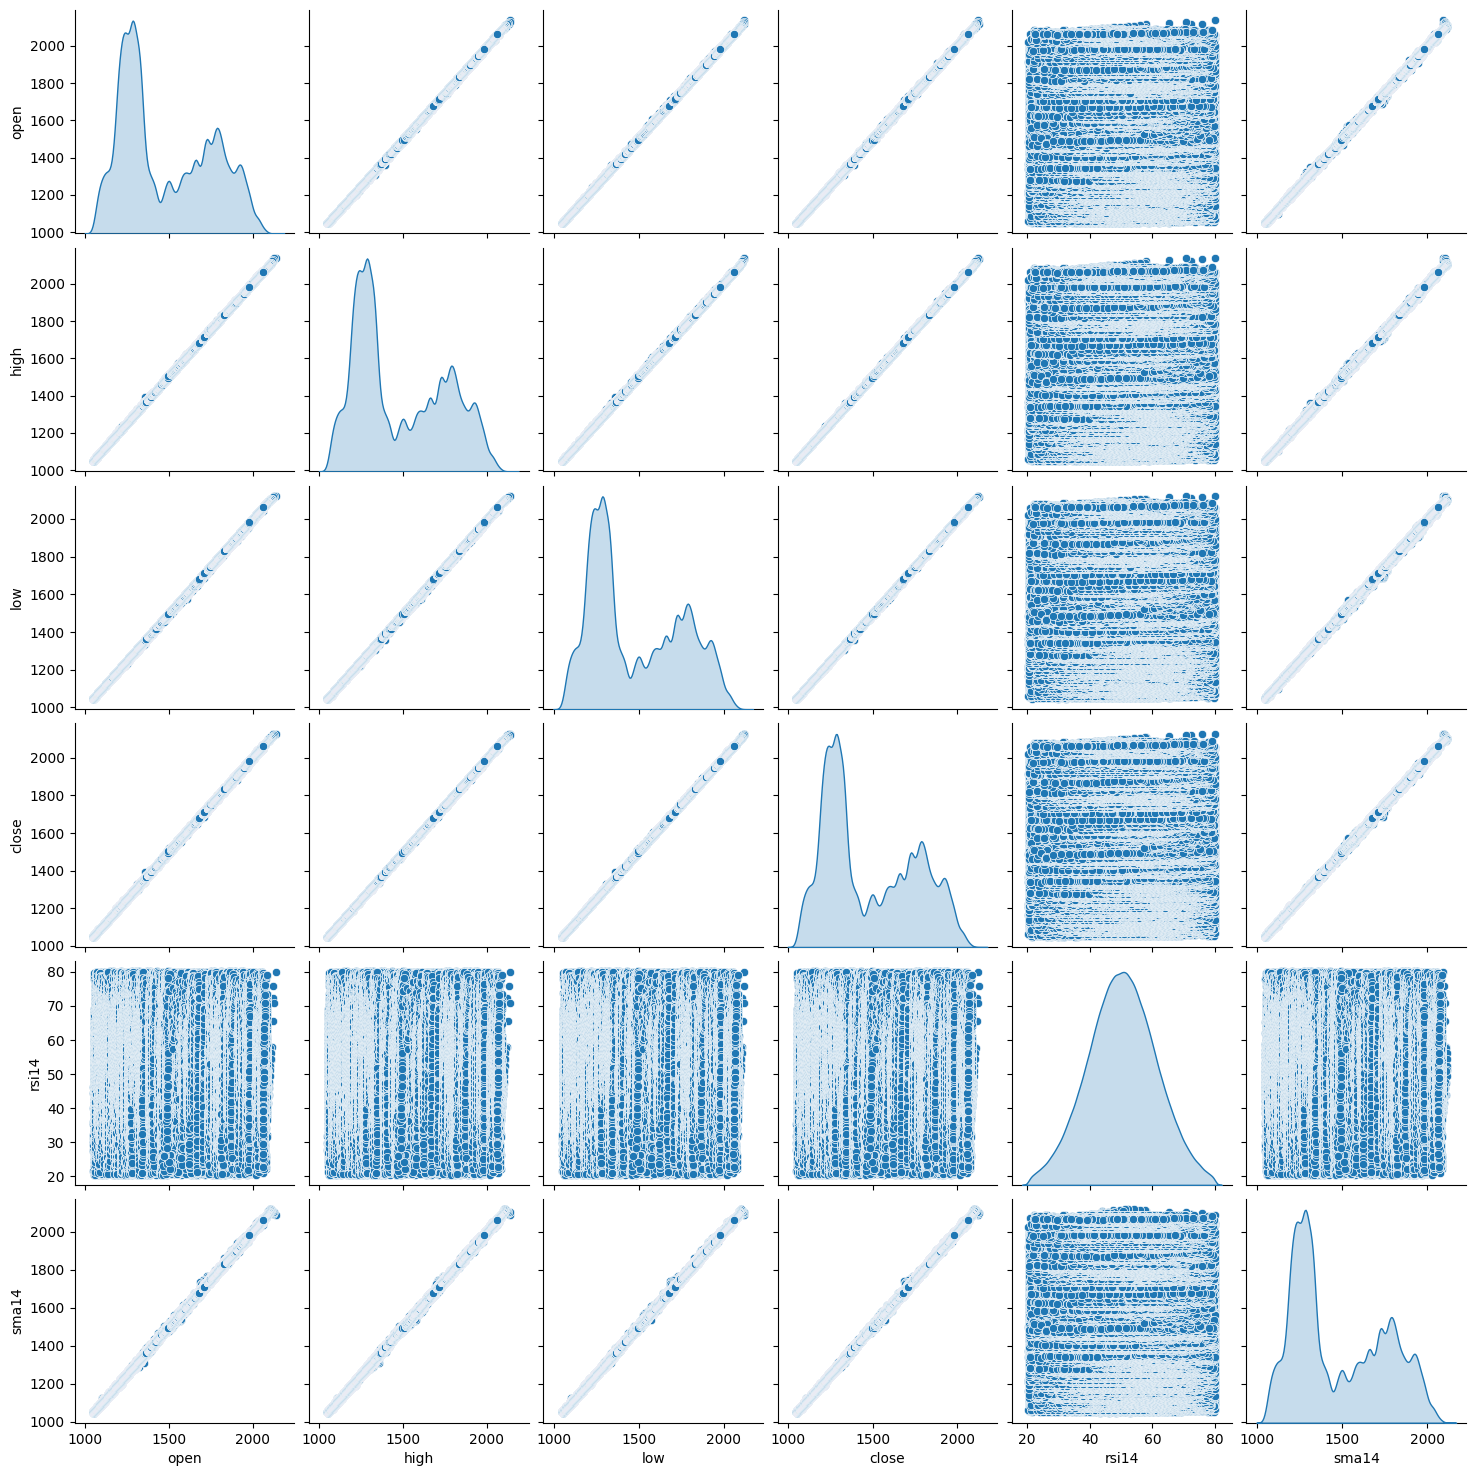

In [ ]:

sns.pairplot(golds_data[numeric_columns], diag_kind='kde')
plt.show()


Terlihat pada kolerasi matriks dibawah ini bahwa arah kolerasi bernilai positif.

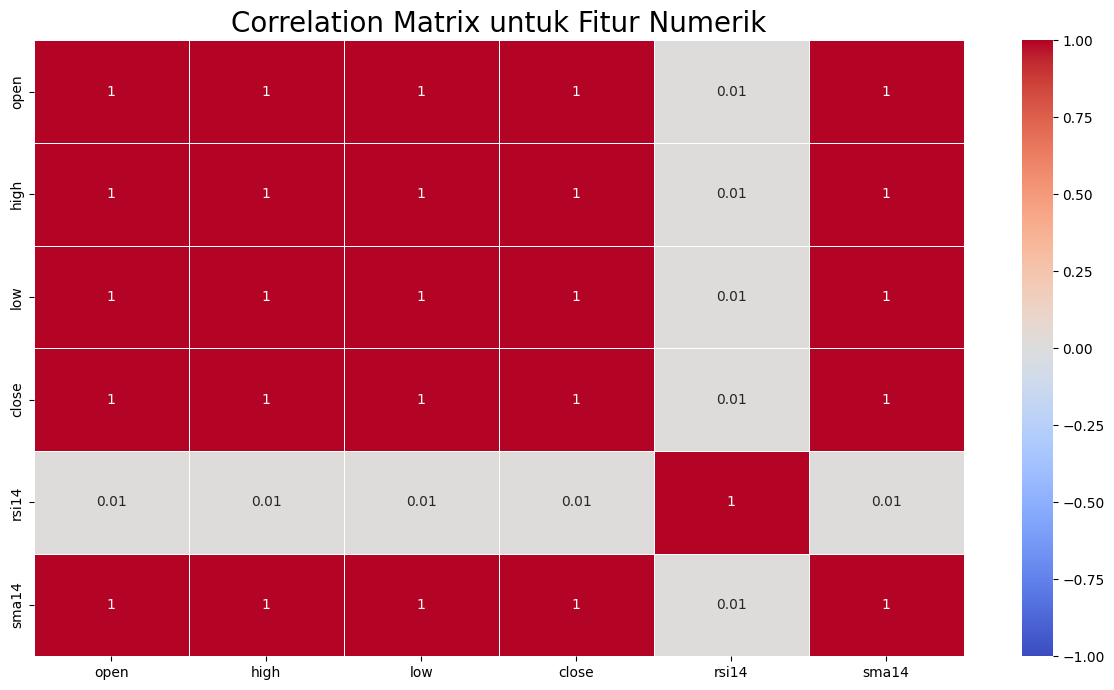

In [ ]:
plt.figure(figsize=(15,8))
correlation_matrix = golds_data[numeric_columns].corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size=20)
plt.show()

#Data Preparation<br>
Tahapan ini,akan dihapus beberapa kolom yang tidak diperlukan untuk membuat model untuk menghindari kegagalan dalam melakukan training. kolom yang tidak diperlukan adalah "time", "rsi14","sma14"<br>
kemudian menghapus nilai yang hilang dan menghapus duplikat data


In [ ]:
new_golds_data = golds_data.copy() # membuat salinan baru dari dataframe sebelumnya
new_golds_data.drop_duplicates(inplace=True) #Menghapus duplikat
new_golds_data.drop(['time','rsi14', 'sma14'], axis=1,inplace=True) #menghapus kolom yang tidak diperlukan
new_golds_data

,open,high,low,close
1,1100.00,1100.30,1099.45,1099.75
2,1099.70,1100.10,1099.30,1099.45
3,1099.50,1099.60,1098.50,1099.45
4,1099.40,1099.60,1098.90,1098.90
5,1098.95,1099.20,1098.60,1098.90
...,...,...,...,...
985999,2063.07,2063.24,2062.60,2062.96
986000,2062.95,2063.09,2062.52,2062.61
986001,2062.60,2062.83,2062.34,2062.56
986002,2062.56,2063.20,2062.51,2062.54


#Tain-Test Split
Karena dataset ini cukup besar, maka pembagian dataset adalah 80:20

In [ ]:
# Acak urutan baris dalam DataFrame
new_golds_data = new_golds_data.sample(frac=1, random_state=42).reset_index(drop=True)
x = new_golds_data.drop(["close"],axis =1)
y = new_golds_data["close"]

# Bagi DataFrame menjadi data train dan data test menggunakan train_test_split
x_train_data, x_test_data,y_train_data,y_test_data = train_test_split(x,y, test_size=0.2, random_state=42)

print("Total sample data:", len(new_golds_data))
print("Jumlah baris data X train:", len(x_train_data))
print("Jumlah baris data y train:", len(y_train_data))
print("Jumlah baris data X test:", len(x_test_data))
print("Jumlah baris data y test:", len(y_test_data))

Total sample data: 976717
Jumlah baris data X train: 781373
Jumlah baris data y train: 781373
Jumlah baris data X test: 195344
Jumlah baris data y test: 195344


#Standarisasi <br>


In [ ]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()
# Implementasi fit_transform pada data train
train_data_scaled = scaler.fit_transform(x_train_data)
# Implementasi transform pada data test
test_data_scaled = scaler.transform(x_test_data)
#cetak
print("train data")
print(train_data_scaled[:5])
print("test data")
print(test_data_scaled[:5])

train data
[[-0.99146717 -0.98940357 -0.99305061]
 [ 0.96305289  0.96358725  0.96231154]
 [-1.11694217 -1.11586048 -1.11590876]
 [-0.86146052 -0.86227835 -0.860233  ]
 [ 0.41717351  0.42564413  0.4185546 ]]
test data
[[-1.44396463 -1.44280693 -1.44349334]
 [-0.26551001 -0.2655621  -0.26679023]
 [-1.02824049 -1.02864754 -1.0287263 ]
 [-0.49599324 -0.49144697 -0.4951518 ]
 [-0.50598518 -0.50722624 -0.50470247]]


In [ ]:
x_train_data.describe().round(4)

,open,high,low
count,781373.0000,781373.0000,781373.0000
mean,1480.8198,1481.3267,1480.3108
std,269.2172,269.3409,269.0910
min,1046.9200,1048.0800,1046.3800
25%,1252.7300,1253.0500,1252.3900
50%,1374.0700,1374.6800,1373.4500
75%,1732.8300,1733.5000,1732.1800
max,2124.0400,2130.3200,2118.1600


In [ ]:
x_test_data.describe().round(4)

,open,high,low
count,195344.0000,195344.0000,195344.0000
mean,1480.5306,1481.0337,1480.0224
std,269.0334,269.1560,268.9055
min,1048.4400,1048.6000,1044.1800
25%,1253.1675,1253.5100,1252.8500
50%,1373.2800,1373.8250,1372.7400
75%,1732.3250,1732.9625,1731.6200
max,2138.0000,2138.3800,2122.4200


#Modeling<br>


In [ ]:
models = pd.DataFrame(index=['train_mse','test_mse'],columns=['KKN','RandomForest','Boosting','LR'])

In [ ]:
# buat model prediksi
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train_data, y_train_data)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(x_train_data), y_true=y_train_data)
# Prediksi menggunakan model KNN
y_pred_knn = knn.predict(x_test_data)
# Cetak hasil prediksi
print("Hasil prediksi menggunakan model KNN:")
print(y_pred_knn)
print(models.loc['train_mse','knn'] )


Hasil prediksi menggunakan model KNN:
[1092.442 1408.908 1203.909 ... 1283.089 1774.635 1958.791]
0.12458972500841442


In [ ]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train_data, y_train_data)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(x_train_data), y_true=y_train_data)
# Prediksi menggunakan model RandomForest
y_pred_rf = RF.predict(x_test_data)
# Cetak hasil prediksi
print("Hasil prediksi menggunakan model RandomForest:")
print(y_pred_rf)
print(models.loc['train_mse', 'RandomForest'])

Hasil prediksi menggunakan model RandomForest:
[1092.40840273 1409.02053411 1203.81482793 ... 1283.09821198 1774.59460929
 1958.61437661]
0.06968800152582648


In [ ]:
# buat model prediksi
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(x_train_data, y_train_data)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(x_train_data), y_true=y_train_data)

# Prediksi menggunakan model Boosting
y_pred_boosting = boosting.predict(x_test_data)
# Cetak hasil prediksi
print("Hasil prediksi menggunakan model Bosting:")
print(y_pred_boosting)

print( models.loc['train_mse','Boosting'])

Hasil prediksi menggunakan model Bosting:
[1133.91824799 1464.96405568 1247.54298146 ... 1248.35102615 1817.53223466
 1958.07268848]
1059.026086660935


In [ ]:
# buat model prediksi

linearregression = LinearRegression(n_jobs = -1)
linearregression.fit(x_train_data,y_train_data)
models.loc['train_mse','LR'] = mean_squared_error(y_pred=linearregression.predict(x_train_data), y_true=y_train_data)

# Prediksi menggunakan model LinearRegression
y_pred_lr = linearregression.predict(x_test_data)
# Cetak hasil prediksi
print("Hasil prediksi menggunakan model RandomForest:")
print(y_pred_lr)

print(models.loc['train_mse','LR'])

Hasil prediksi menggunakan model RandomForest:
[1092.41664804 1409.07594208 1203.81986499 ... 1283.00687295 1774.61813186
 1958.68922995]
0.1339675625013496


#Evaluation

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting','LR'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting,'LR':linearregression}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train_data, y_pred=model.predict(x_train_data))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test_data, y_pred=model.predict(x_test_data))/1e3
# Panggil mse
mse

,train,test
KNN,0.000125,0.000152
RF,0.00007,0.000152
Boosting,1.059026,1.060601
LR,0.000134,0.000134


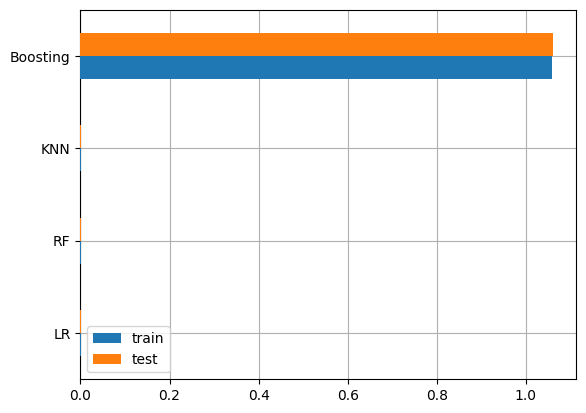

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=True).plot(kind='barh', ax=ax, zorder=4)
ax.grid(zorder=0)

#Evaluasi<br>
Melakukan valuasi terhadap ke empat model yang ada untuk melihat hasil terbaik.

In [ ]:
prediksi = x_test_data.iloc[:1].copy()
pred_dict = {'y_true':y_test_data[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting,prediksi_LR
545465,1091.92,1092.4,1092.4,1133.9,1092.4
